In [7]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import *
import pygad

def PID(G, pid):
    Kp = pid[0]
    Ti = pid[1]
    Td = pid[2]
    R = Kp*(1 + 1/(Ti*s) + Td*s/(0.001*s + 1))

    dt = 0.1
    t = np.arange(0,10, dt)

    Loop = ct.series(R, G)
    CLoop = ct.feedback(Loop, 1)

    t1, yout = ct.step_response(CLoop, t)
    uout, t2, xout = ct.matlab.lsim(R, U=1-yout, T=t)

    Q = 1
    R = 0.001

    J = dt*np.sum(Q*(1-yout)**2 + R*uout**2)
    return J, t, yout, uout

s = ct.tf('s')
T = 1
dz = 1
k = 2

G = (k)/(T**2 * s**2 + 2*dz*T*s + 1)

In [8]:
def fitness_func(solution, solution_idx):
    fitness,t,  yout, uout = PID(G, solution)
    return -fitness

ga_instance = pygad.GA(num_generations=10,
                      num_parents_mating=4, 
                      fitness_func=fitness_func,
                      sol_per_pop=8,
                      num_genes=3,
                      init_range_low=0.1,
                      init_range_high=10,
                      parent_selection_type="sss",
                      keep_parents=1,
                      crossover_type="single_point",
                      mutation_type="random",
                      mutation_percent_genes=0.01)

C:\Users\Mateusz\anaconda3\lib\site-packages\pygad\pygad.py:490: UserWarning: The percentage of genes to mutate (mutation_percent_genes=0.01) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [14]:
ga_instance.run()

C:\Users\Mateusz\anaconda3\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


Best solution: [1.42 2.07 0.03]
Fitness: 0.75


C:\Users\Mateusz\anaconda3\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


Text(0.5, 1.0, 'Control signal')

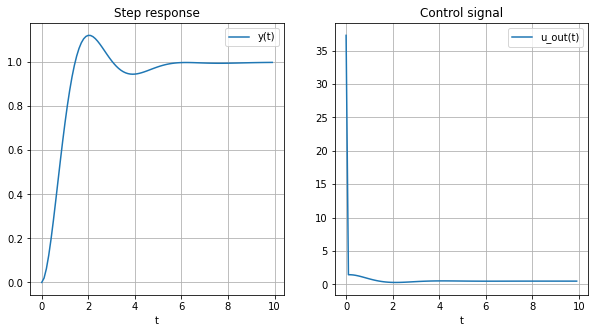

In [17]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best solution: {np.round(solution,2)}")
print(f"Fitness: {np.round(-solution_fitness,2)}")
J, t, y, u = PID(G, solution)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(t, y, label='y(t)')
ax2.plot(t, u, label='u_out(t)')
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()  
ax1.set_xlabel('t')
ax2.set_xlabel('t')
ax1.set_title('Step response')
ax2.set_title('Control signal')